In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
salary=pd.read_csv("C:\PythonScripts\course-files\StackOverflowDeveloperSurvey.csv",usecols=['Professional','Country','University','EmploymentStatus','FormalEducation','Salary'])
salary.head()

,Professional,Country,University,EmploymentStatus,FormalEducation,Salary
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,NaN
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,113750.0
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,NaN
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,NaN


In [3]:
salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Professional      51392 non-null  object 
 1   Country           51392 non-null  object 
 2   University        51392 non-null  object 
 3   EmploymentStatus  51392 non-null  object 
 4   FormalEducation   51392 non-null  object 
 5   Salary            12891 non-null  float64
dtypes: float64(1), object(5)
memory usage: 18.5 MB


In [4]:
salary.describe(include='object').T

,count,unique,top,freq
Professional,51392,5,Professional developer,36131
Country,51392,201,United States,11455
University,51392,4,No,37543
EmploymentStatus,51392,7,Employed full-time,36148
FormalEducation,51392,9,Bachelor's degree,21609


In [5]:
salary.dtypes.value_counts()

object     5
float64    1
dtype: int64

In [8]:
cols=['Professional', 'Country', 'University', 'EmploymentStatus', 'FormalEducation']
for col in cols:
    salary[col] = salary[col].astype('category')

In [9]:
salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Professional      51392 non-null  category
 1   Country           51392 non-null  category
 2   University        51392 non-null  category
 3   EmploymentStatus  51392 non-null  category
 4   FormalEducation   51392 non-null  category
 5   Salary            12891 non-null  float64 
dtypes: category(5), float64(1)
memory usage: 726.8 KB


In [10]:
salary.query('Country == "Poland"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 7 to 51369
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Professional      1290 non-null   category
 1   Country           1290 non-null   category
 2   University        1290 non-null   category
 3   EmploymentStatus  1290 non-null   category
 4   FormalEducation   1290 non-null   category
 5   Salary            317 non-null    float64 
dtypes: category(5), float64(1)
memory usage: 38.5 KB


In [11]:
salary.query('Country == "United States"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11455 entries, 0 to 51390
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Professional      11455 non-null  category
 1   Country           11455 non-null  category
 2   University        11455 non-null  category
 3   EmploymentStatus  11455 non-null  category
 4   FormalEducation   11455 non-null  category
 5   Salary            3781 non-null   float64 
dtypes: category(5), float64(1)
memory usage: 256.9 KB


In [12]:
countries=salary.Country.value_counts().head(10)

In [13]:
countries.rename({'United States':'USA','United Kingdom':'UK','Russian Federation':'Russia'}, inplace=True)

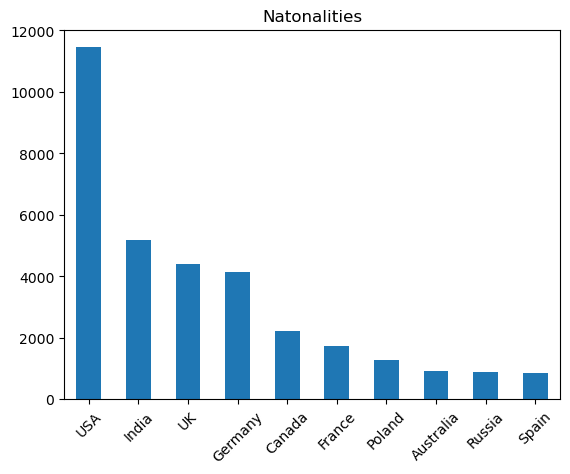

In [14]:
_=countries.plot(kind='bar', rot=45, title='Natonalities')

In [15]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,12891.0,56298.480641,39880.905277,0.0,26440.371839,50000.0,80000.0,197000.0


In [16]:
salary.Salary.max()

197000.0

In [17]:
salary.Salary.idxmax()

31600

In [18]:
salary.iloc[salary.Salary.idxmax()]

Professional        Professional developer
Country                      United States
University                  Yes, part-time
EmploymentStatus        Employed full-time
FormalEducation            Doctoral degree
Salary                            197000.0
Name: 31600, dtype: object

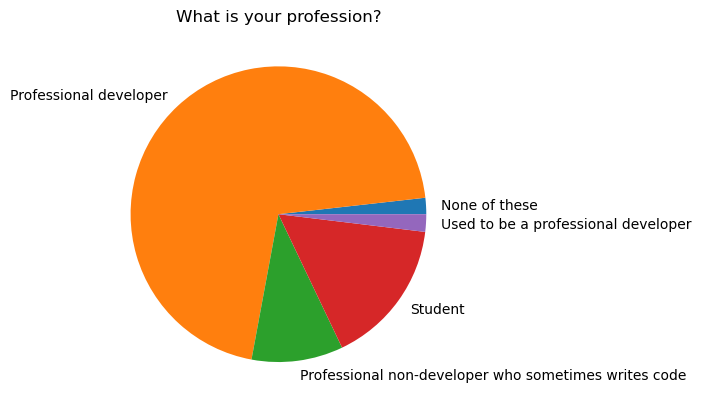

In [19]:
prof_groups = salary.groupby(salary.Professional).size()
_ = prof_groups.plot(kind='pie', title='What is your profession?', ylabel='')

In [20]:
edu_groups = salary.groupby(salary.FormalEducation).mean()
edu_groups.sort_values(by='Salary', ascending=False, inplace=True)
edu_groups

,Salary
FormalEducation,
Doctoral degree,78527.933053
Primary/elementary school,62677.337356
Master's degree,58250.838766
Bachelor's degree,56914.358553
Some college/university study without earning a bachelor's degree,55912.810459
I never completed any formal education,44430.660621
Secondary school,40395.148419
Professional degree,39503.658863
I prefer not to answer,38284.836141


In [21]:
edu_groups.rename({'I never completed any formal education':'No formal education',
                   "Some college/university study without earning a bachelor's degree":
                  "Not earning a degree",'Primary/elementary school':'Primary school'}, inplace=True)

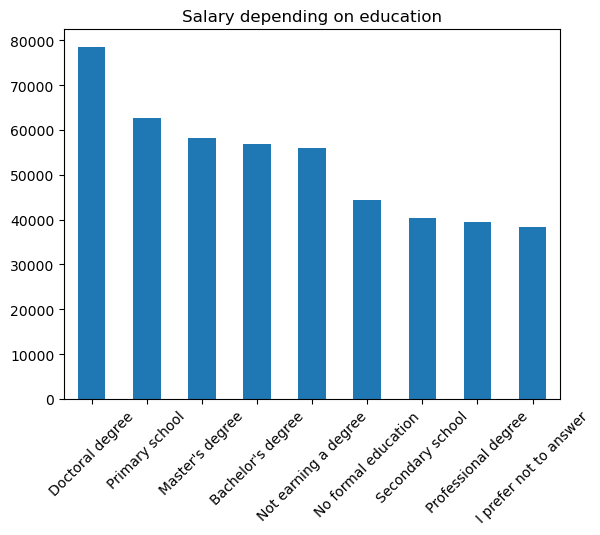

In [22]:
_=edu_groups.plot(kind='bar', title='Salary depending on education', xlabel='', legend=False, rot=45)

In [23]:
edu_groups_pl = salary.query('Country == "Poland"').groupby(salary.FormalEducation).mean().dropna()
edu_groups_pl.sort_values(by='Salary', ascending=False, inplace=True)
edu_groups_pl

,Salary
FormalEducation,
Doctoral degree,27242.798354
Master's degree,25989.679079
Secondary school,20339.437509
I never completed any formal education,18518.518519
Some college/university study without earning a bachelor's degree,18161.673525
Bachelor's degree,16715.364470
I prefer not to answer,15947.089947


In [24]:
edu_groups_pl.rename({'I never completed any formal education':'No formal education',
                   "Some college/university study without earning a bachelor's degree":
                  "Not earning a degree"}, inplace=True)

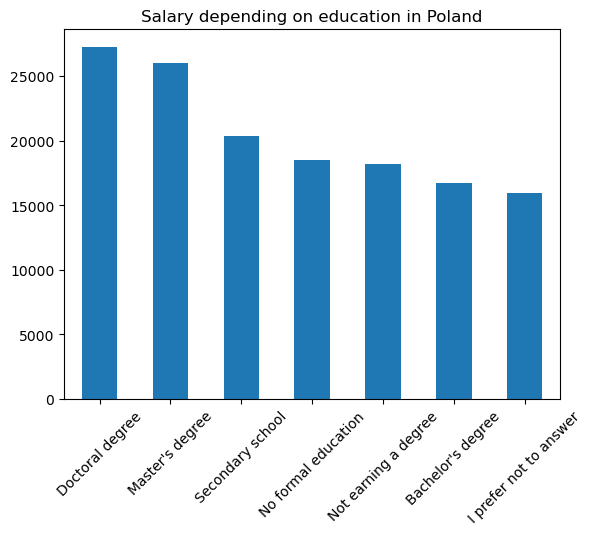

In [25]:
_=edu_groups_pl.plot(kind='bar', title='Salary depending on education in Poland', xlabel='', legend=False, rot=45)

In [26]:
edu_groups_us = salary.query('Country == "United States"').groupby(salary.FormalEducation).mean().dropna()
edu_groups_us.sort_values(by='Salary', ascending=False, inplace=True)
edu_groups_us

,Salary
FormalEducation,
Doctoral degree,120981.340909
I never completed any formal education,115562.500000
Master's degree,108882.814400
I prefer not to answer,106600.000000
Professional degree,105636.363636
Bachelor's degree,93970.036914
Some college/university study without earning a bachelor's degree,90624.376917
Primary/elementary school,83389.555556
Secondary school,79901.000689


In [27]:
edu_groups_us.rename({'I never completed any formal education':'No formal education',
                   "Some college/university study without earning a bachelor's degree":
                  "Not earning a degree",'Primary/elementary school':'Primary school'}, inplace=True)

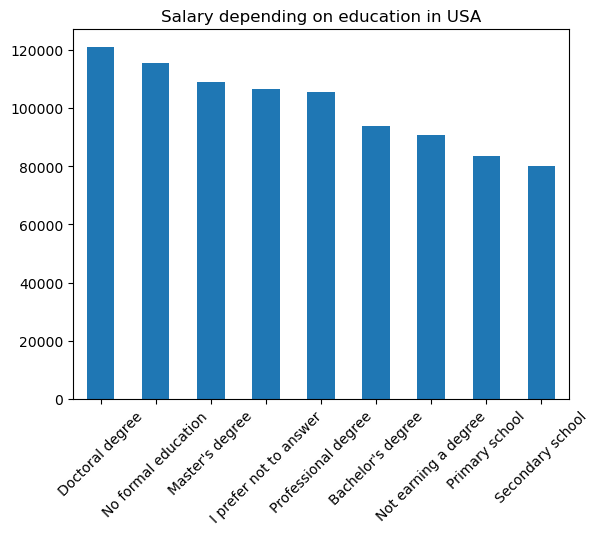

In [28]:
_=edu_groups_us.plot(kind='bar', title='Salary depending on education in USA', xlabel='', legend=False, rot=45)